In [1]:
# import dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# read csvs into DF

org_profile = pd.read_csv('../Data/organization_profiles.csv')

tweets1 = pd.read_csv('../Data/tweets_all_revised2.csv')

# tweets2 = pd.read_excel('../Data/tweets_all_revised2.xlsx') # Not necessary

C:\Users\farha\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
org_profile.head()

,Unnamed: 0,Organization Name,twitter_handle,screen_name,agency_catergory,followers_count,friends_count,location
0,0,Adults In Motion,@AIMkitchener,AIMkitchener,Disabilities,662,800,"Kitchener, Ontario"
1,1,African Family Revival Organization,@AFROKitchener,AFROKitchener,"Arts, Culture and Heritage",125,64,"Kitchener, Ontario"
2,2,Alzheimer Society of Waterloo Wellington,@alzsocww,alzsocww,Seniors,1376,432,"Waterloo Wellington, Ontario"
3,3,Big Brothers Big Sisters of Waterloo Region,@BBBSWR,BBBSWR,"Children, Youth and Family",2462,1551,Waterloo Region
4,4,Bridges to Belonging,@BtoBelonging,BtoBelonging,Disabilities,1432,1254,Waterloo Region


In [4]:
# value counts of agency category
org_profile['agency_catergory'].value_counts()

Community and Social Services        21
Arts, Culture and Heritage           11
Disabilities                         10
Children, Youth and Family           10
Sports, Recreation and Leisure        7
Health and Wellness                   4
Environment                           3
Immigration and Settlement            3
Literacy and Skills Development       2
Grant-Giving Foundation               2
Seniors                               2
Animals                               2
Employment                            2
Education Institution                 2
Criminal Justice and Civil Rights     2
Library and Research                  2
LGBTQ                                 1
Name: agency_catergory, dtype: int64

In [5]:
# followers grouped by agency category
followers_by_cat = org_profile.groupby(['agency_catergory']).sum()['followers_count']

Text(0.5, 0, 'Agency Categories')

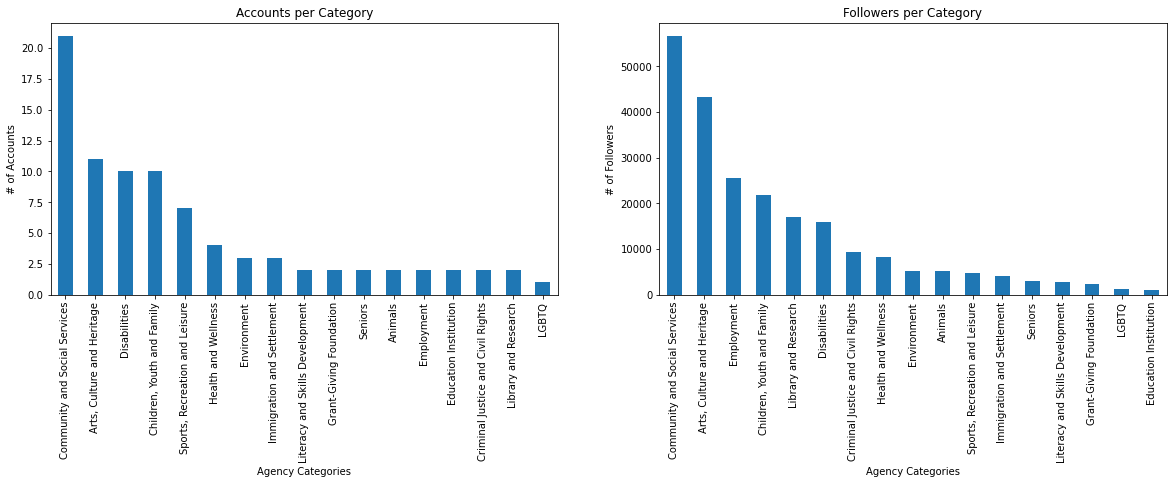

In [6]:
# Plot counts of agencies per category and sum of followers per category

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

org_profile['agency_catergory'].value_counts().plot.bar(ax=axes[0])
followers_by_cat.sort_values(ascending=False).plot.bar(ax=axes[1])

axes[0].set_title('Accounts per Category')
axes[0].set_ylabel('# of Accounts')
axes[0].set_xlabel('Agency Categories')

axes[1].set_title('Followers per Category')
axes[1].set_ylabel('# of Followers')
axes[1].set_xlabel('Agency Categories')

In [7]:
# Sort (top 10) organizations by follower count in descending order

org_profile.sort_values('followers_count', ascending=False).head(10)

,Unnamed: 0,Organization Name,twitter_handle,screen_name,agency_catergory,followers_count,friends_count,location
74,74,Uptown Waterloo BIA,@uptownwaterloo,uptownwaterloo,Employment,25052,423,"Waterloo, ON"
81,81,The Museum,@THEMUSEUM,THEMUSEUM,"Arts, Culture and Heritage",18095,6858,"Kitchener, Ontario, Canada"
40,40,Kitchener Public Library,@KitchLibrary,KitchLibrary,Library and Research,12630,3035,"Kitchener, Ontario, Canada"
42,42,Kitchener-Waterloo Art Gallery,@kwartgallery,kwartgallery,"Arts, Culture and Heritage",10448,3119,"Kitchener, Canada"
23,23,Food Bank of Waterloo Region,@FoodBankWatReg,FoodBankWatReg,Community and Social Services,8886,2091,Waterloo Region
32,32,John Howard Society of Waterloo-Wellington,@jhsontario,jhsontario,Criminal Justice and Civil Rights,6972,2655,"Ontario, Canada"
28,28,House of Friendship,@hofwatreg,hofwatreg,Community and Social Services,6672,1071,"Kitchener Waterloo, Ontario"
45,45,Kitchener-Waterloo Symphony Volunteer Committee,@kw_symphony,kw_symphony,"Arts, Culture and Heritage",6663,2424,"Kitchener, Ontario"
35,35,KidsAbility Centre for Child Development,@KidsAbility,KidsAbility,Disabilities,6406,2277,Ontario
52,52,Mennonite Central Committee Ontario (MCC),@mccorg,mccorg,Community and Social Services,6098,293,NaN


In [8]:
# Correlation between followers and friends?

org_profile['followers_count'].corr(org_profile['friends_count'])

0.5501928382719242

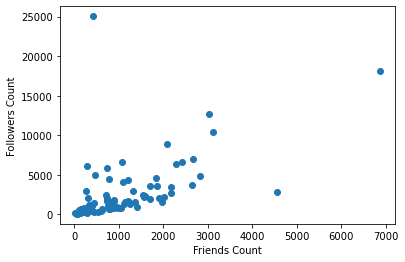

In [9]:
# plot the variables: followers as dependent(y-axis), friends as independent(x-axis)

plt.scatter(org_profile['friends_count'], org_profile['followers_count'])
plt.xlabel('Friends Count')
plt.ylabel('Followers Count')
plt.show()

## Regression model to test the correlation. Hypothesis: there is a random correlation between friends and followers

In [10]:
# Create the independent variable for the model
X = org_profile.friends_count.values.reshape(-1, 1)

In [11]:
X.shape

(86, 1)

In [12]:
# Create the dependent variable
y = org_profile.followers_count

In [13]:
# Create the model and fit it

model = LinearRegression()

In [14]:
model.fit(X, y)

LinearRegression()

In [15]:
y_pred = model.predict(X)
print(y_pred.shape)

(86,)


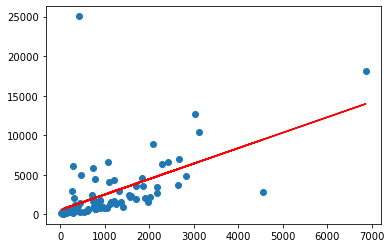

In [16]:
# plot the predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [17]:
# Examine the parameters of the model: the slope and y-intercept
print(f'slope: {model.coef_}')
print(f'y-intercept: {model.intercept_}')

slope: [1.95612672]
y-intercept: 547.3888357821515


In [18]:
tweets1.head()

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
0,0,885747516,2021-02-26 17:59:51,AIMkitchener,🍅 What will your garden look like this year? 🪴...,['https://t.co/g1djW5JMVT'],2.0,0.0,https://twitter.com/i/web/status/1365360946378...,[],False,False,False,False,Adults In Motion,What will your garden look like this year \n...
1,1,885747516,2021-02-24 19:34:45,AIMkitchener,"Virtual connecting is not the next big thing, ...",['https://t.co/b1Ts6V60hS'],1.0,0.0,https://twitter.com/i/web/status/1364660054046...,[],False,False,False,False,Adults In Motion,Virtual connecting is not the next big thing i...
2,2,885747516,2021-02-15 18:14:22,AIMkitchener,“Treat your friends like family and your famil...,['https://t.co/jpFQ3K5oSK'],1.0,0.0,https://twitter.com/i/web/status/1361378331254...,[],False,False,False,False,Adults In Motion,“Treat your friends like family and your famil...
3,3,885747516,2021-02-01 17:54:56,AIMkitchener,🤗 Sending virtual Love Squeezes to anyone who ...,['https://t.co/zk4ZZm0cZa'],1.0,0.0,https://twitter.com/i/web/status/1356300010737...,"['VirtualHug', 'SpreadKindness', 'SpreadLove']",False,False,False,False,Adults In Motion,Sending virtual Love Squeezes to anyone who n...
4,4,885747516,2021-01-15 18:40:36,AIMkitchener,How are YOU getting active and outdoors?! Tell...,['https://t.co/eZB1kEPYUz'],1.0,0.0,NaN,[],True,False,False,False,Adults In Motion,How are YOU getting active and outdoors Tell u...


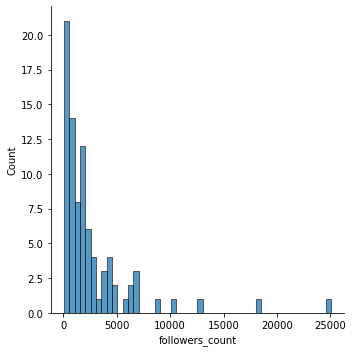

In [27]:
# Distribution of followers
sns.displot(org_profile['followers_count'], bins=50)

<AxesSubplot:xlabel='friends_count', ylabel='Count'>

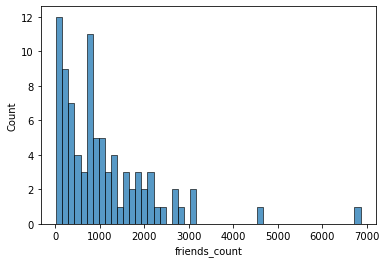

In [29]:
# plot distribution of friends
sns.histplot(org_profile['friends_count'], bins=50)

In [39]:
# Get the value count of favorites
tweets1['favorite_count'].value_counts()

0.0      107645
1.0       25732
2.0       14643
3.0        9522
4.0        6497
          ...  
578.0         1
283.0         1
203.0         1
192.0         1
79.0          1
Name: favorite_count, Length: 121, dtype: int64

In [40]:
# Get the value count of retweets
tweets1['retweet_count'].value_counts()

0.0         67558
1.0         40372
2.0         23973
3.0         14756
4.0          9257
            ...  
5205.0          1
325.0           1
927427.0        1
5197.0          1
503.0           1
Name: retweet_count, Length: 1045, dtype: int64

C:\Users\farha\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retweet_count', ylabel='Density'>

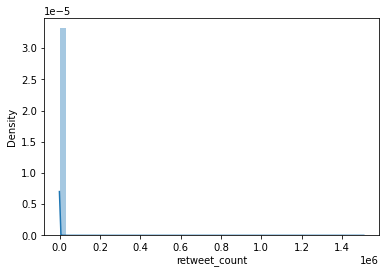

In [31]:
sns.distplot(tweets1['retweet_count'], bins=50)